In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
pd.set_option('display.max_rows',2000)

In [3]:
pd.set_option('display.max_colwidth', 200)

In [4]:
df = pd.read_csv('execution_database.csv')
df.head()

Date             Name  Age Sex    Race  \
0  01/10/1986      James Roach   25   m   White   
1  01/11/1985      Joseph Shaw   29   m   White   
2  01/08/1997        Paul Ruiz   49   m  Latino   
3  01/08/1997  Earl Van Denton   47   m   White   
4  01/06/1994      Keith Wells   31   m   White   

     Number / Race / Sex of Victims State Region            Method Juvenile  \
0  1 White Male(s)1 White Female(s)    SC      S     Electrocution      Yes   
1  1 White Male(s)1 White Female(s)    SC      S     Electrocution       No   
2                   2 White Male(s)    AR      S  Lethal Injection       No   
3                   2 White Male(s)    AR      S  Lethal Injection       No   
4  1 White Male(s)1 White Female(s)    ID      W  Lethal Injection       No   

  Federal Volunteer Foreign National    County  
0      No        No               No  Richland  
1      No        No               No  Richland  
2      No        No               No     Logan  
3      No        No               No    Nevada  
4      No       Yes               No       Ada

## Work done
Among countries applying capital punishment worldwide, US is the only Western country which keeps authorizing and applying the death penalty. Claims and predictions about the upcoming “death of death penalty” have been published (http://time.com/deathpenalty/), but it doesn’t seem to be proven real. This is an edgy human-right topic, which currently happens to be in news because of the outset of a trial over Tennessee’s new lethal injection procedure (https://apnews.com/4db89b7b443942fabcd2d420b81c85c1), 

To explore death penalty in US overtime, I searched online and I found an execution database provided and published by the “Death Penalty Information Center” (https://deathpenaltyinfo.org/views-executions), including data for executions from 1977 onwards. 

My cleaning and transforming work basically includes the following:

-Extracting year from each date of execution provided in a given column “Date”

-Creating a new column for the year of each execution

-Creating a new column for the decade which year values correspond to

-Replacing gender abbreviations with new gender values in a given column “Sex”, which refers to the gender of prisoners executed

-Replacing states and region abbreviations in new columns created for state and regions names


After that, I did some analysis to discover:

-Most active states in terms of applying death penalty

-Age and gender of executed prisoners

-Most common methods of death penalty used 

-How all of the above have been changing during the years


# Findings (to be revised)

Texas, Virginia and Oklahoma are the US states which mostly apply the death penalty; specifically, Texas seems to be historically the top state applying the capital punishment, counting 552 executions out of 1477 in total (37.4%). Between the years 2000 and 2010, executions seem to increase in comparison to ‘90s, before decreasing again from 2010 onwards. Prisoners probably increase their living days, since mean age keeps being greater than in the past: In ‘10s, prisoners’ mean age is the greatest one (46.7 years old), while mean age is just 35.5 years old in ’80s. Taking into account the total research sample, mean age is 41.6 years old. In Virginia, Utah, Texas and more, executed prisoners’ mean age is lower than the total average. Lethal injection is the most common method of execution (88.2%), having been developed from 1990 onwards. Before that, electrocution had been the most common method applied, reaching more than 70% of cases in ‘80s, when lethal injection was used by 42%.



## “Nice to have” improvements

-Cleaning and analysis on victims’ data

-Further work on existing graphics styling, including legends and reonderings (figure out ranking/discover exactly how “sort values” combined with “head” work; correct/ improve possible affected graphics)

-Find a styling pattern to apply in all project’s graphics (consistency improvement)

-Add legends to some existing graphics


### Cleaning and Transforming

In [5]:
df.columns = df.columns.str.replace(' / ', '_')

In [6]:
df.columns = df.columns.str.replace('\s+', '_')

In [7]:
df['year'] = df['Date'].str.extract(r"\d+/\d+/(\d+)", re.IGNORECASE)
#df['year']

In [8]:
df.dtypes

Date                          object
Name                          object
Age                            int64
Sex                           object
Race                          object
Number_Race_Sex_of_Victims    object
State                         object
Region                        object
Method                        object
Juvenile                      object
Federal                       object
Volunteer                     object
Foreign_National              object
County                        object
year                          object
dtype: object

In [9]:
df['year'] = df.year.fillna(0).astype(int)

In [10]:
def get_decades(row):
    if row['year'] >= int(1970) and row['year'] <int(1980):
        val='70s'
    elif row['year'] >= int(1980) and row['year'] <int(1990):
        val='80s'
    elif row['year'] >= int(1990) and row['year'] <int(2000):
        val='90s'
    elif row['year'] >= int(2000) and row['year'] <int(2010):
        val='00s'
    elif row['year'] >= int(2010):
        val='10s'
    else:
        val='unknown year'
    return val

In [11]:
df['decade'] = df.apply(get_decades,axis = 1)

In [12]:
df['Sex'].replace('m','Male',inplace=True)
df['Sex'].replace('f','Female',inplace=True)

In [13]:
df = df.rename(columns={'State': 'State_Abbreviations'})
                       #'Region':'Region_Abbreviations'})

In [14]:
df.head()

Date             Name  Age   Sex    Race  \
0  01/10/1986      James Roach   25  Male   White   
1  01/11/1985      Joseph Shaw   29  Male   White   
2  01/08/1997        Paul Ruiz   49  Male  Latino   
3  01/08/1997  Earl Van Denton   47  Male   White   
4  01/06/1994      Keith Wells   31  Male   White   

         Number_Race_Sex_of_Victims State_Abbreviations Region  \
0  1 White Male(s)1 White Female(s)                  SC      S   
1  1 White Male(s)1 White Female(s)                  SC      S   
2                   2 White Male(s)                  AR      S   
3                   2 White Male(s)                  AR      S   
4  1 White Male(s)1 White Female(s)                  ID      W   

             Method Juvenile Federal Volunteer Foreign_National    County  \
0     Electrocution      Yes      No        No               No  Richland   
1     Electrocution       No      No        No               No  Richland   
2  Lethal Injection       No      No        No               No     Logan   
3  Lethal Injection       No      No        No               No    Nevada   
4  Lethal Injection       No      No       Yes               No       Ada   

   year decade  
0  1986    80s  
1  1985    80s  
2  1997    90s  
3  1997    90s  
4  1994    90s

In [15]:
df['State'] = df.State_Abbreviations.replace(
    {'SC': "South Carolina",
    'AR': "Arkansas",
    'ID': "Idaho",
    'VA': "Virginia",
    'TX': 'Texas',
    'WA': 'Washington',
    'LA': 'Lousiana',
    'MO': 'Missouri',
    'OK': 'Oklahoma',
    'GA': 'Georgia',
    'FL': 'Florida',
    'CA': 'California',
     'AZ': 'Arizona',
     'OH': 'Ohio',
     'AL': 'Alabama',
     'IN': 'Indiana',
     'NC': 'North Carolina',
     'DE': 'Delaware',
     'IL': 'Ilinois',
     'PA': 'Pennsylvania',
     'MT': 'Montana',
     'MS': 'Mississippi',
     'NV': 'Nevada',
     'UT': 'Utah',
     'TN': 'Tennessee',
     'MD': 'Maryland',
     'KY': 'Kentacky',
     'SD': 'South Dakota',
     'NE': 'Nebraska',
     'OR': 'Oregon',
     'CO': 'Colorado',
     'CT': 'Connecticut',
     'NM': 'New Mexico',
     'WY': 'Wyoming',
     'FE': 'FE'
})

In [16]:
df = df.rename(columns={'Region':'Region_Abbreviations'})

In [17]:
df['Region'] = df.Region_Abbreviations.replace(
    {'S': "South",
    'W': "West",
    'N': "Northeast",
    'M': "Midwest"})

In [18]:
df

Date                         Name  Age     Sex             Race  \
0     01/10/1986                  James Roach   25    Male            White   
1     01/11/1985                  Joseph Shaw   29    Male            White   
2     01/08/1997                    Paul Ruiz   49    Male           Latino   
3     01/08/1997              Earl Van Denton   47    Male            White   
4     01/06/1994                  Keith Wells   31    Male            White   
5     01/10/2000               Douglas Thomas   26    Male            White   
6     01/12/2000             Earl Heiselbertz   48    Male            White   
7     01/05/1993                 Westley Dodd   31    Male            White   
8     01/04/1985                 David Martin   32    Male            White   
9     01/09/2002                James Johnson   52    Male            White   
10    01/08/1999                Ronnie Howard   40    Male            Black   
11    01/09/2001                  Eddie Trice   48    Male            Black   
12    01/11/2001                  Wanda Allen   41  Female            Black   
13    01/09/2001                   Jack Clark   37    Male            White   
14    01/09/1985              Roosevelt Green   28    Male            Black   
15    01/07/1988             Robert Streetman   27    Male            White   
16    01/06/1989                George Mercer   44    Male            White   
17    01/04/1995                 Jesse Jacobs   44    Male            White   
18    01/04/1996               Walter Correll   34    Male            White   
19    01/08/1997              Kirt Wainwright   30    Male            Black   
20    01/10/1997                Billy Waldrop   44    Male            White   
21    01/05/1999                   John Moody   46    Male            White   
22    01/07/1999                  John Castro   37    Male  Native American   
23    01/08/1999               Dobie Williams   38    Male            Black   
24    01/06/2000              Malcolm Johnson   41    Male            Black   
25    01/07/2000                  David Duren   37    Male            White   
26    01/11/2001                 Robert Glock   39    Male            White   
27    01/09/2002                Michael Moore   38    Male            White   
28    02/09/1999            Jaturun Siripongs   43    Male            Asian   
29    02/09/1998                Steven Renfro   40    Male            White   
30    02/04/1999                 Sean Sellers   29    Male            White   
31    02/02/1994               Harold Barnard   51    Male            White   
32    02/10/2000              Michael Roberts   41    Male            Black   
33    02/06/2002               Michael Owsley   40    Male            Black   
34    02/07/1995               Jeffrey Motley   29    Male            White   
35    02/10/1999               George Cordova   39    Male           Latino   
36    02/08/2001             Adolph Hernandez   50    Male           Latino   
37    02/04/2003                 John Elliott   42    Male           Latino   
38    02/06/2003                   Henry Dunn   28    Male            Black   
39    02/11/1992               Johnny Garrett   28    Male            White   
40    02/09/1996                  Leo Jenkins   38    Male            White   
41    02/06/1997               Michael George   39    Male            White   
42    02/10/1997              Richard Brimage   41    Male            White   
43    02/03/1998                 Karla Tucker   38  Female            White   
44    02/10/1998                 Tony Mackall   33    Male            Black   
45    02/03/1999             Darrick Gerlaugh   38    Male  Native American   
46    02/04/1999                     Tony Fry   23    Male            White   
47    02/11/1999                 Danny Barber   43    Male            White   
48    02/01/2001                   D.L. Jones   61    Male            White   
49    02/07/2001               Stanley Lingar   37    Male    

In [19]:
df.to_csv("executions_kelly.csv", index=False)

## Analysis and graphics

In [20]:
df.State.value_counts()

Texas             552
Virginia          113
Oklahoma          112
Florida            96
Missouri           88
Georgia            72
Alabama            63
Ohio               55
South Carolina     43
North Carolina     43
Arizona            37
Arkansas           31
Lousiana           28
Mississippi        21
Indiana            20
Delaware           16
California         13
Nevada             12
Ilinois            12
Utah                7
Tennessee           6
Washington          5
Maryland            5
Idaho               3
FE                  3
Pennsylvania        3
Montana             3
South Dakota        3
Nebraska            3
Kentacky            3
Oregon              2
Wyoming             1
New Mexico          1
Colorado            1
Connecticut         1
Name: State, dtype: int64

In [21]:
df.State.count()

1477

In [22]:
df.groupby(['decade']).State.value_counts().unstack()

State   Alabama  Arizona  Arkansas  California  Colorado  Connecticut  \
decade                                                                  
00s        25.0      4.0       6.0         6.0       NaN          1.0   
10s        19.0     14.0       4.0         NaN       NaN          NaN   
70s         NaN      NaN       NaN         NaN       NaN          NaN   
80s         7.0      NaN       NaN         NaN       NaN          NaN   
90s        12.0     19.0      21.0         7.0       1.0          NaN   

State   Delaware   FE  Florida  Georgia   ...     Oregon  Pennsylvania  \
decade                                    ...                            
00s          4.0  3.0     24.0     23.0   ...        NaN           NaN   
10s          2.0  NaN     28.0     26.0   ...        NaN           NaN   
70s          NaN  NaN      1.0      NaN   ...        NaN           NaN   
80s          NaN  NaN     20.0     14.0   ...        NaN           NaN   
90s         10.0  NaN     23.0      9.0   ...        2.0           3.0   

State   South Carolina  South Dakota  Tennessee  Texas  Utah  Virginia  \
decade                                                                   
00s               18.0           1.0        6.0  248.0   NaN      32.0   
10s                1.0           2.0        NaN  105.0   1.0       8.0   
70s                NaN           NaN        NaN    NaN   1.0       NaN   
80s                2.0           NaN        NaN   33.0   2.0       8.0   
90s               22.0           NaN        NaN  166.0   3.0      65.0   

State   Washington  Wyoming  
decade                       
00s            1.0      NaN  
10s            1.0      NaN  
70s            NaN      NaN  
80s            NaN      NaN  
90s            3.0      1.0  

[5 rows x 35 columns]

In [23]:
states_wide = df.groupby(['State']).decade.value_counts().unstack().reset_index().fillna(0)
states_wide.head()

decade       State   00s   10s  70s  80s   90s
0          Alabama  25.0  19.0  0.0  7.0  12.0
1          Arizona   4.0  14.0  0.0  0.0  19.0
2         Arkansas   6.0   4.0  0.0  0.0  21.0
3       California   6.0   0.0  0.0  0.0   7.0
4         Colorado   0.0   0.0  0.0  0.0   1.0

In [24]:
#states_wide.plot()

In [25]:
#states_wide.plot(x='decade',y='State')

In [26]:
round(df.State.value_counts(normalize=True)*100,1).head(10)

Texas             37.4
Virginia           7.7
Oklahoma           7.6
Florida            6.5
Missouri           6.0
Georgia            4.9
Alabama            4.3
Ohio               3.7
South Carolina     2.9
North Carolina     2.9
Name: State, dtype: float64

### Graph 1.1: Most active states using death penalty

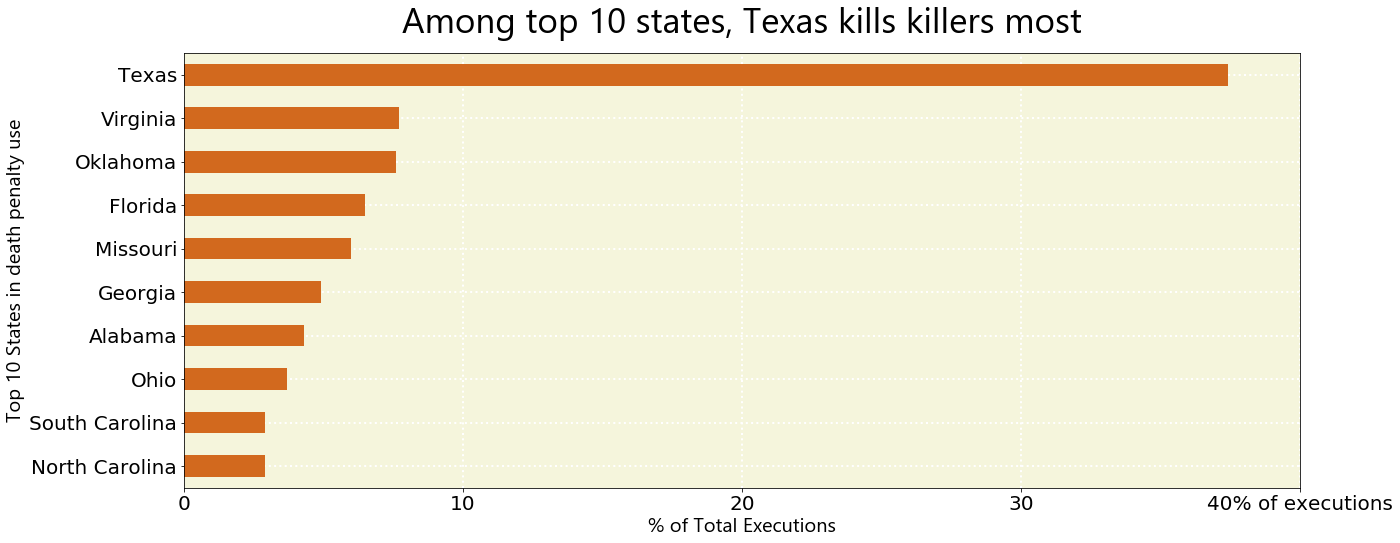

In [27]:
#states = df.State.value_counts(normalize=True).head(10).plot(kind='bar',figsize=(30,10))
states = round(df.State.value_counts(ascending=True, normalize=True)*100,1)
graph = states.tail(10).plot(kind='barh',figsize=(20,8), color='chocolate')

graph.set_title('Among top 10 states, Texas kills killers most',fontsize=35,fontname="Nirmala UI",pad=20)
graph.tick_params(axis='both', labelsize=20)

graph.set_xticks([0,10,20,30,40])
graph.set_xticklabels(['0','10','20','30','40% of executions'])

graph.set_xlabel('% of Total Executions',fontsize=20,fontname="Nirmala UI")
graph.set_ylabel('Top 10 States in death penalty use',fontsize=20,fontname="Nirmala UI")

graph.grid(True)
graph.set_axisbelow(True)
graph.set_facecolor('beige')
graph.grid(True,axis='both',color='white',linestyle=':',linewidth=2)

#graph.yaxis.label.set_visible(True)

### Graph 1.2: Most active states using death penalty (same graph in an other way)

In [28]:
states_pct = round(df.State.value_counts(ascending=True,normalize=True)*100,1).reset_index().tail(10)
states_pct

index  State
25  North Carolina    2.9
26  South Carolina    2.9
27            Ohio    3.7
28         Alabama    4.3
29         Georgia    4.9
30        Missouri    6.0
31         Florida    6.5
32        Oklahoma    7.6
33        Virginia    7.7
34           Texas   37.4

In [29]:
states_pct = states_pct.rename(columns={'index': 'states','State':'percentage'})
states_pct

states  percentage
25  North Carolina         2.9
26  South Carolina         2.9
27            Ohio         3.7
28         Alabama         4.3
29         Georgia         4.9
30        Missouri         6.0
31         Florida         6.5
32        Oklahoma         7.6
33        Virginia         7.7
34           Texas        37.4

In [30]:
#states_pct.index.value_counts()

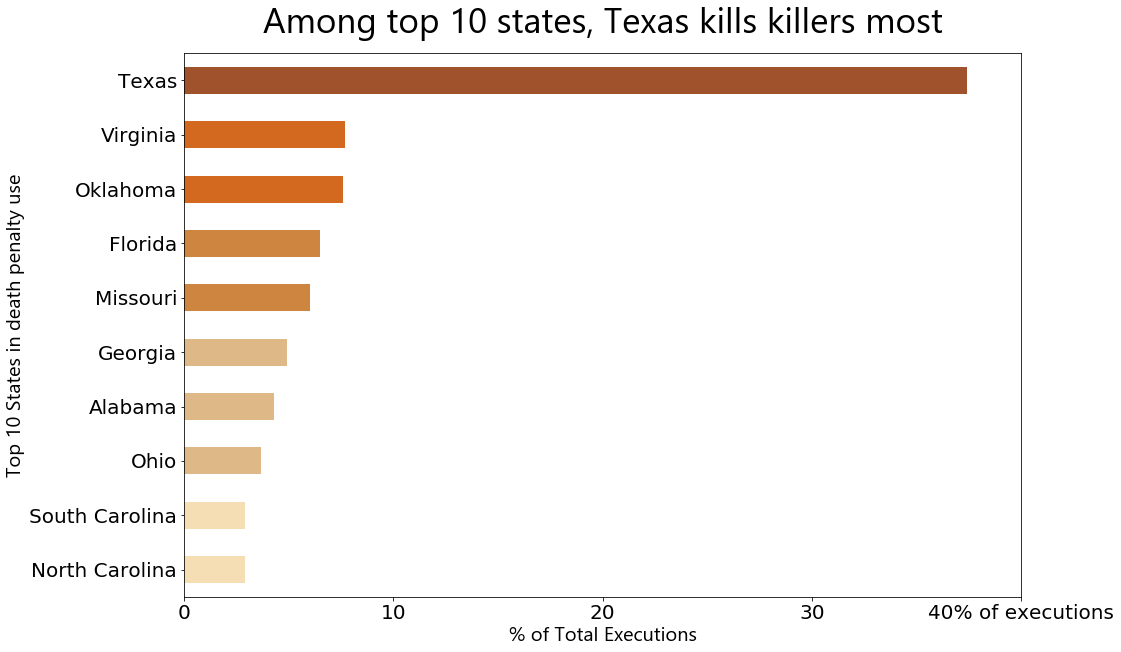

In [31]:
#states = df.State.value_counts(normalize=True).head(10).plot(kind='bar',figsize=(30,10))
def get_color(state):
    if state == 'Texas':
        return 'sienna'
    elif state == 'Virginia' or state == 'Oklahoma':
        return 'chocolate'
    elif state == 'Florida' or state == 'Missouri':
        return 'peru'
    elif state == 'Georgia' or state == 'Alabama' or state =='Ohio':
        return 'burlywood'
    else:
        return 'wheat'
    
bar_colors = [get_color(state) for state in states_pct.states]

graph = states_pct.sort_index().plot(x='states', y='percentage', kind='barh', color=bar_colors, figsize=(15,10), legend=False)

#bar_colors = [get_color(state) for state in states_pct]

#states = round(df.State.value_counts(ascending=True, normalize=True)*100,1)
#graph = states.tail(10).plot(kind='barh',figsize=(20,8), color=bar_colors)

graph.set_title('Among top 10 states, Texas kills killers most',fontsize=35,fontname="Nirmala UI",pad=20)
graph.tick_params(axis='both', labelsize=20)

graph.set_xticks([0,10,20,30,40])
graph.set_xticklabels(['0','10','20','30','40% of executions'])

graph.set_xlabel('% of Total Executions',fontsize=20,fontname="Nirmala UI")
graph.set_ylabel('Top 10 States in death penalty use',fontsize=20,fontname="Nirmala UI")

graph.grid(False)
graph.set_axisbelow(True)
graph.set_facecolor('white')
#graph.set_facecolor('beige')
#graph.grid(True,axis='both',color='white',linestyle=':',linewidth=2)

In [25]:
df.groupby('decade').State.value_counts().sort_values(ascending=False).head(10)

decade  State   
00s     Texas       248
90s     Texas       166
10s     Texas       105
00s     Oklahoma     72
90s     Virginia     65
        Missouri     40
80s     Texas        33
00s     Virginia     32
        Ohio         32
10s     Florida      28
Name: State, dtype: int64

In [26]:
top_by_decade = df.groupby('State').decade.value_counts().sort_values(ascending=False).head(5).unstack().reset_index().fillna(0)
top_by_decade

decade     State    00s    90s    10s
0          Texas  248.0  166.0  105.0
1       Oklahoma   72.0    0.0    0.0
2       Virginia    0.0   65.0    0.0

### Graph 2: What is the average age of prisoners at the time they are executed? How does each state perform on that? Is average age in each state above or below the average age of the total sample?

In [32]:
round(df.groupby('State').Age.mean(),1).sort_values(ascending=True).head(5)

State
Lousiana    34.9
Virginia    35.9
Delaware    37.1
Utah        37.7
Texas       39.5
Name: Age, dtype: float64

In [33]:
round(df.groupby('State').Age.mean(),1).sort_values(ascending=False).head(5)

State
Oregon          56.0
Colorado        53.0
Tennessee       50.2
California      49.8
Pennsylvania    48.7
Name: Age, dtype: float64

In [34]:
round(df.Age.mean(),1)

41.6

In [35]:
ages = round(df.groupby('State').Age.mean(),1).reset_index(name='mean_age')
ages

State  mean_age
0          Alabama      45.7
1          Arizona      47.2
2         Arkansas      43.1
3       California      49.8
4         Colorado      53.0
5      Connecticut      45.0
6         Delaware      37.1
7               FE      43.3
8          Florida      46.7
9          Georgia      45.9
10           Idaho      46.0
11         Ilinois      44.3
12         Indiana      43.8
13        Kentacky      43.7
14        Lousiana      34.9
15        Maryland      40.6
16     Mississippi      45.1
17        Missouri      43.7
18         Montana      41.0
19        Nebraska      45.7
20          Nevada      40.3
21      New Mexico      45.0
22  North Carolina      42.3
23            Ohio      45.2
24        Oklahoma      42.6
25          Oregon      56.0
26    Pennsylvania      48.7
27  South Carolina      41.0
28    South Dakota      45.0
29       Tennessee      50.2
30           Texas      39.5
31            Utah      37.7
32        Virginia      35.9
33      Washington      41.4
34         Wyoming      42.0

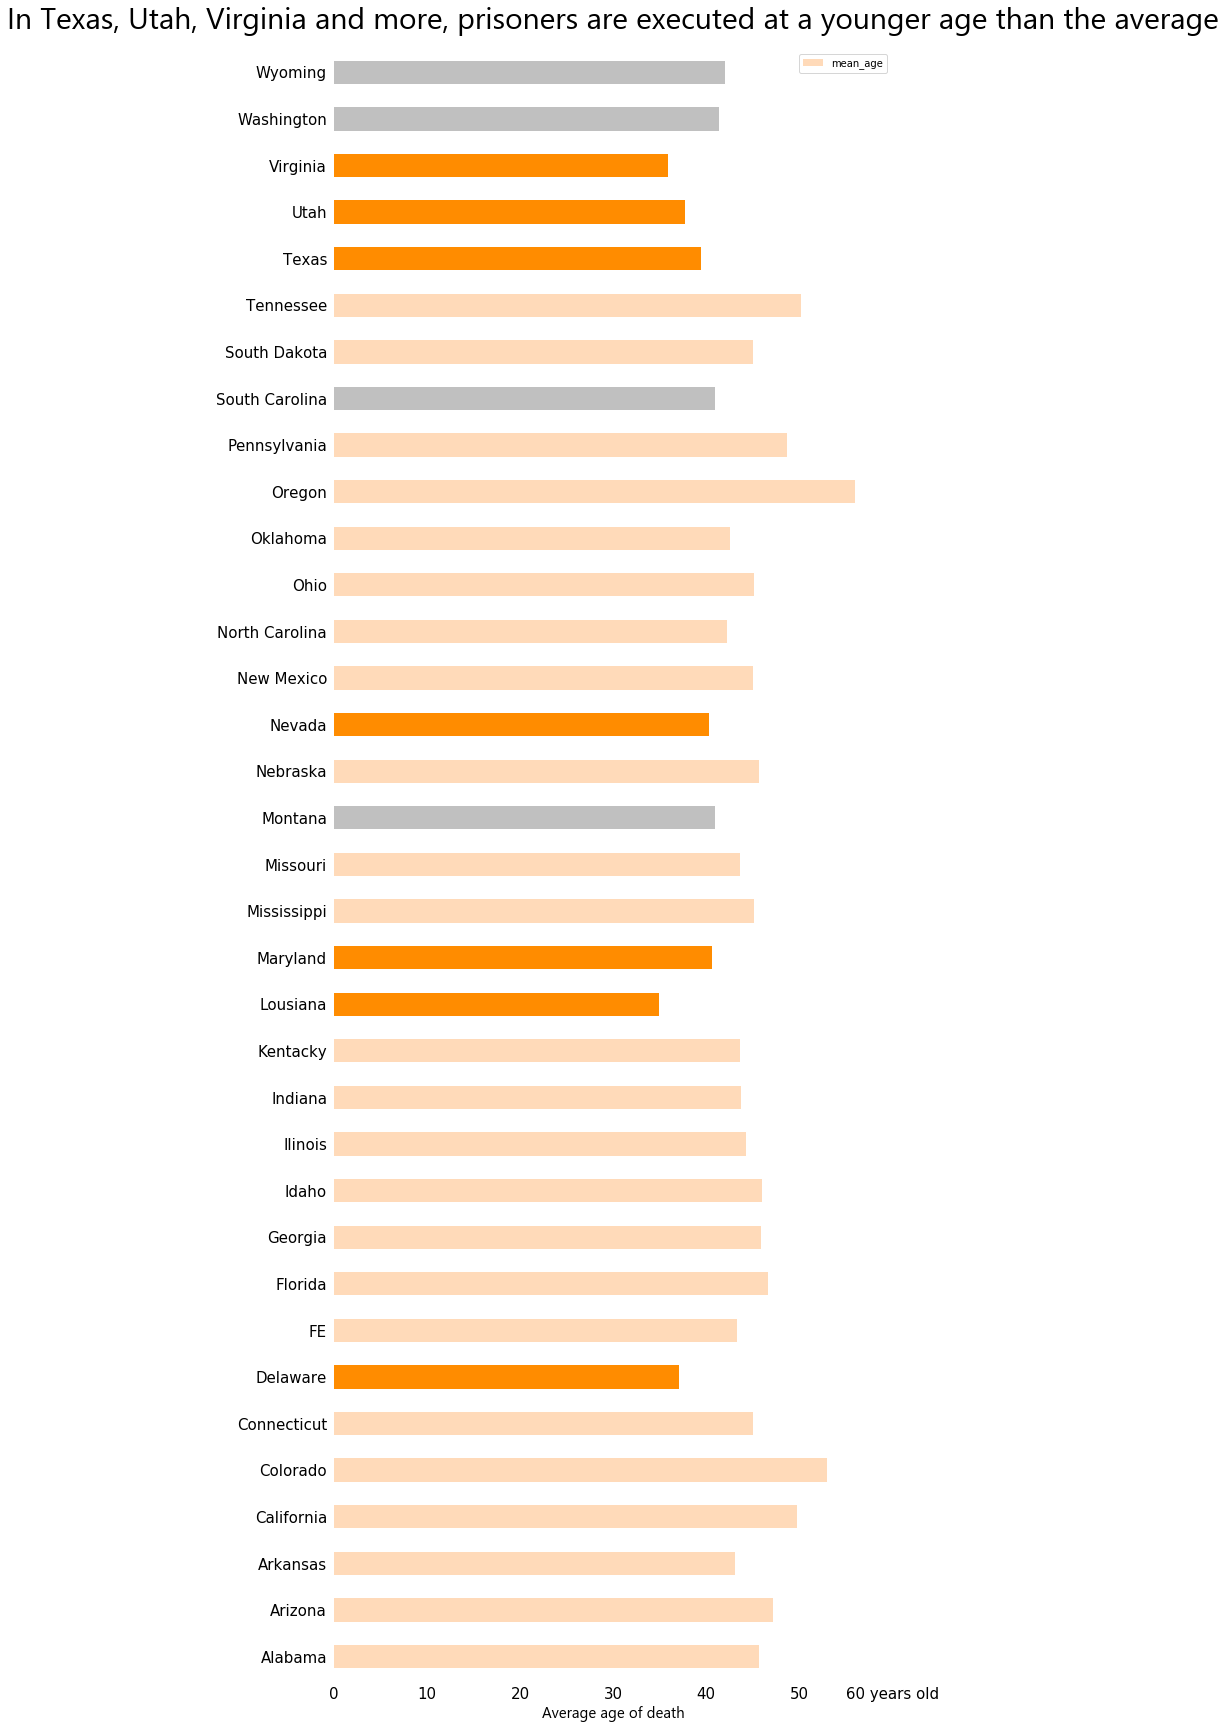

In [36]:
def get_color(mean_age):
    if mean_age < 41:
        return 'darkorange'
    elif mean_age >=41 and mean_age<=42:
        return 'silver'
    else:
        return 'peachpuff'

bar_colors = [get_color(mean_age) for mean_age in ages.mean_age]

ax = ages.sort_index().plot(x='State', y='mean_age', kind='barh', color=bar_colors, figsize=(10,30))

ax.set_title('In Texas, Utah, Virginia and more, prisoners are executed at a younger age than the average',fontsize=30,fontname="Nirmala UI",pad=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel('Average age of death',fontsize=15,fontname="Nirmala UI")
#ax.set_ylabel('',fontsize=15,fontname="Nirmala UI")

ax.set_xticks([0,10,20,30,40,50,60])
ax.set_xticklabels(['0','10', '20','30','40','50','60 years old'])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major',left=False,bottom=False,grid_alpha=0.5)
#ax.set_facecolor('lightgrey')

#ax.grid(True,axis='x',color='white',linestyle=':',linewidth=1)
#ax.set_axisbelow(True)
#ax.set_xlim(0,60)

ax.yaxis.label.set_visible(False)

### Graph 3.1: How much death penalty has been being used overtime?

In [37]:
df.decade.value_counts()

00s             590
90s             478
10s             289
80s             117
70s               3
unknown year      2
Name: decade, dtype: int64

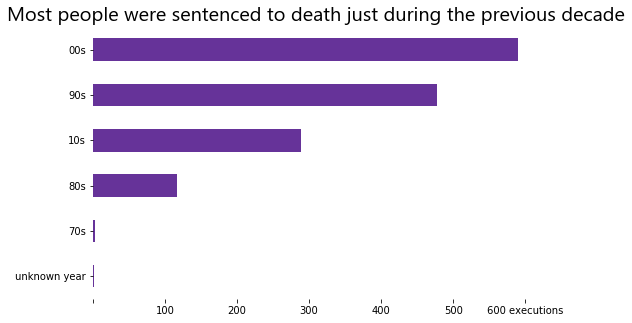

In [38]:
decades = df.decade.value_counts(ascending=True).plot(x='country',kind='barh', figsize=(8,5), color='rebeccapurple')

decades.set_xticklabels(['','100','200','300','400','500','600 executions'])

decades.spines['top'].set_visible(False)
decades.spines['left'].set_visible(False)
decades.spines['bottom'].set_visible(False)
decades.spines['right'].set_visible(False)

decades.set_title('Most people were sentenced to death just during the previous decade')
decades.title.set_fontsize(20)
decades.title.set_fontname("Nirmala UI")


### Graph 3.2: How much death penalty has been being used overtime? (same graph in another way)

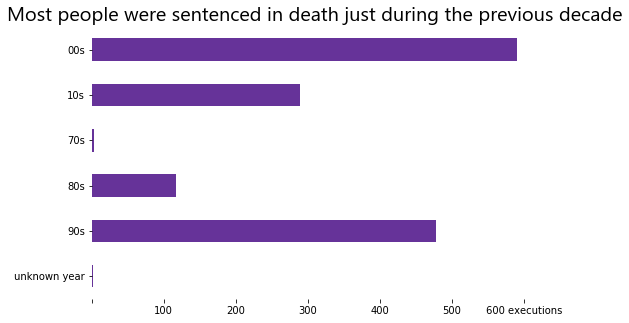

In [39]:
decades = df.decade.value_counts().sort_index(ascending=False).plot(x='country',kind='barh', figsize=(8,5), color='rebeccapurple')

decades.set_xticklabels(['','100','200','300','400','500','600 executions'])

decades.spines['top'].set_visible(False)
decades.spines['left'].set_visible(False)
decades.spines['bottom'].set_visible(False)
decades.spines['right'].set_visible(False)

decades.set_title('Most people were sentenced in death just during the previous decade')
decades.title.set_fontsize(20)
decades.title.set_fontname("Nirmala UI")

In [35]:
round(df.Age.mean(),1)

41.6

In [36]:
round(df.groupby('decade').Age.mean(),1)

decade
00s             41.8
10s             46.7
70s             37.3
80s             35.5
90s             40.1
unknown year     0.0
Name: Age, dtype: float64

In [37]:
df.Race.value_counts()

White              821
Black              507
Latino             124
Native American     16
Asian                7
Other                2
Name: Race, dtype: int64

In [38]:
df.groupby('decade').Race.value_counts()

decade  Race           
00s     White              331
        Black              202
        Latino              46
        Native American      7
        Asian                2
        Other                2
10s     White              156
        Black               94
        Latino              38
        Native American      1
70s     White                3
80s     White               61
        Black               49
        Latino               7
90s     White              270
        Black              162
        Latino              33
        Native American      8
        Asian                5
Name: Race, dtype: int64

In [39]:
round(df.groupby('decade').Race.value_counts(normalize=True)*100,1)

decade  Race           
00s     White               56.1
        Black               34.2
        Latino               7.8
        Native American      1.2
        Asian                0.3
        Other                0.3
10s     White               54.0
        Black               32.5
        Latino              13.1
        Native American      0.3
70s     White              100.0
80s     White               52.1
        Black               41.9
        Latino               6.0
90s     White               56.5
        Black               33.9
        Latino               6.9
        Native American      1.7
        Asian                1.0
Name: Race, dtype: float64

In [40]:
top_by_race = df.groupby('State').Race.value_counts().sort_values(ascending=False).head(3).unstack().reset_index().fillna(0)
top_by_race

Race  State  White  Black  Latino
0     Texas    242    201     105

In [88]:
df

Date                         Name  Age     Sex             Race  \
0     01/10/1986                  James Roach   25    Male            White   
1     01/11/1985                  Joseph Shaw   29    Male            White   
2     01/08/1997                    Paul Ruiz   49    Male           Latino   
3     01/08/1997              Earl Van Denton   47    Male            White   
4     01/06/1994                  Keith Wells   31    Male            White   
5     01/10/2000               Douglas Thomas   26    Male            White   
6     01/12/2000             Earl Heiselbertz   48    Male            White   
7     01/05/1993                 Westley Dodd   31    Male            White   
8     01/04/1985                 David Martin   32    Male            White   
9     01/09/2002                James Johnson   52    Male            White   
10    01/08/1999                Ronnie Howard   40    Male            Black   
11    01/09/2001                  Eddie Trice   48    Male            Black   
12    01/11/2001                  Wanda Allen   41  Female            Black   
13    01/09/2001                   Jack Clark   37    Male            White   
14    01/09/1985              Roosevelt Green   28    Male            Black   
15    01/07/1988             Robert Streetman   27    Male            White   
16    01/06/1989                George Mercer   44    Male            White   
17    01/04/1995                 Jesse Jacobs   44    Male            White   
18    01/04/1996               Walter Correll   34    Male            White   
19    01/08/1997              Kirt Wainwright   30    Male            Black   
20    01/10/1997                Billy Waldrop   44    Male            White   
21    01/05/1999                   John Moody   46    Male            White   
22    01/07/1999                  John Castro   37    Male  Native American   
23    01/08/1999               Dobie Williams   38    Male            Black   
24    01/06/2000              Malcolm Johnson   41    Male            Black   
25    01/07/2000                  David Duren   37    Male            White   
26    01/11/2001                 Robert Glock   39    Male            White   
27    01/09/2002                Michael Moore   38    Male            White   
28    02/09/1999            Jaturun Siripongs   43    Male            Asian   
29    02/09/1998                Steven Renfro   40    Male            White   
30    02/04/1999                 Sean Sellers   29    Male            White   
31    02/02/1994               Harold Barnard   51    Male            White   
32    02/10/2000              Michael Roberts   41    Male            Black   
33    02/06/2002               Michael Owsley   40    Male            Black   
34    02/07/1995               Jeffrey Motley   29    Male            White   
35    02/10/1999               George Cordova   39    Male           Latino   
36    02/08/2001             Adolph Hernandez   50    Male           Latino   
37    02/04/2003                 John Elliott   42    Male           Latino   
38    02/06/2003                   Henry Dunn   28    Male            Black   
39    02/11/1992               Johnny Garrett   28    Male            White   
40    02/09/1996                  Leo Jenkins   38    Male            White   
41    02/06/1997               Michael George   39    Male            White   
42    02/10/1997              Richard Brimage   41    Male            White   
43    02/03/1998                 Karla Tucker   38  Female            White   
44    02/10/1998                 Tony Mackall   33    Male            Black   
45    02/03/1999             Darrick Gerlaugh   38    Male  Native American   
46    02/04/1999                     Tony Fry   23    Male            White   
47    02/11/1999                 Danny Barber   43    Male            White   
48    02/01/2001                   D.L. Jones   61    Male            White   
49    02/07/2001               Stanley Lingar   37    Male    

In [95]:
#df.plot(kind='barh',x='Method',y='decade',stacked=True)

In [ ]:
gender_df.plot(kind='bar', x='state', stacked=True)

In [41]:
#top_by_race_pct = df.groupby('State').Race.value_counts(normalize=True*100).sort_values(ascending=False).head(10).unstack().reset_index().fillna(0)
#top_by_race_pct

### Exploring methods of execution (Graphs 4 & 5)

In [40]:
df.Method.value_counts()

Lethal Injection    1302
Electrocution        158
Gas Chamber           11
Hanging                3
Firing Squad           3
Name: Method, dtype: int64

In [41]:
round(df.Method.value_counts(normalize=True)*100,1)

Lethal Injection    88.2
Electrocution       10.7
Gas Chamber          0.7
Hanging              0.2
Firing Squad         0.2
Name: Method, dtype: float64

In [42]:
by_method = df.groupby('decade').Method.value_counts().sort_values(ascending=False).unstack().reset_index().fillna(0)
by_method

Method decade  Electrocution  Firing Squad  Gas Chamber  Hanging  \
0         00s           12.0           0.0          0.0      0.0   
1         90s           72.0           1.0          6.0      3.0   
2         10s            2.0           1.0          0.0      0.0   
3         80s           71.0           0.0          4.0      0.0   
4         70s            1.0           1.0          1.0      0.0   

Method  Lethal Injection  
0                  578.0  
1                  396.0  
2                  286.0  
3                   42.0  
4                    0.0

## Graph 4: What is the most common method used overtime?

In [43]:
colors = ['darksalmon', 'black', 'yellow', 'blue', 'maroon']

In [44]:
ax.set_title('In Virginia, Utah, Texas and more, prisoners are executed at a younger age than the average',fontsize=30,fontname="Nirmala UI",pad=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel('Average age of death',fontsize=15,fontname="Nirmala UI")
#ax.set_ylabel('',fontsize=15,fontname="Nirmala UI")

ax.set_xticks([0,10,20,30,40,50,60])
ax.set_xticklabels(['0','10', '20','30','40','50','60 years old'])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major',left=False,bottom=False,grid_alpha=0.5)
#ax.set_facecolor('lightgrey')

#ax.grid(True,axis='x',color='white',linestyle=':',linewidth=1)
#ax.set_axisbelow(True)
#ax.set_xlim(0,60)

ax.yaxis.label.set_visible(False)

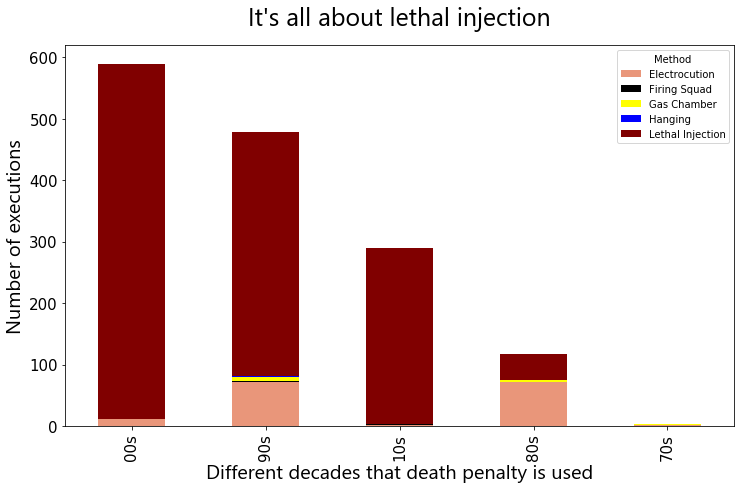

In [45]:
ax = by_method.sort_index().plot(kind='bar',x='decade',stacked=True, color=colors,figsize=(12,7))

ax.set_title("It's all about lethal injection",fontsize=25,fontname="Nirmala UI",pad=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel('Different decades that death penalty is used',fontsize=20,fontname="Nirmala UI")
ax.set_ylabel('Number of executions',fontsize=20,fontname='Nirmala UI')
ax.yaxis.label.set_visible(True)

## Graph 5: What is the most common method used in each state?

In [46]:
method_state = df.groupby('State').Method.value_counts().unstack().reset_index().fillna(0)
method_state.head()

Method       State  Electrocution  Firing Squad  Gas Chamber  Hanging  \
0          Alabama           24.0           0.0          0.0      0.0   
1          Arizona            0.0           0.0          2.0      0.0   
2         Arkansas            1.0           0.0          0.0      0.0   
3       California            0.0           0.0          2.0      0.0   
4         Colorado            0.0           0.0          0.0      0.0   

Method  Lethal Injection  
0                   39.0  
1                   35.0  
2                   30.0  
3                   11.0  
4                    1.0

[Text(0,0,'0'),
 Text(0,0,'100'),
 Text(0,0,'200'),
 Text(0,0,'300'),
 Text(0,0,'400'),
 Text(0,0,'500'),
 Text(0,0,'600')]

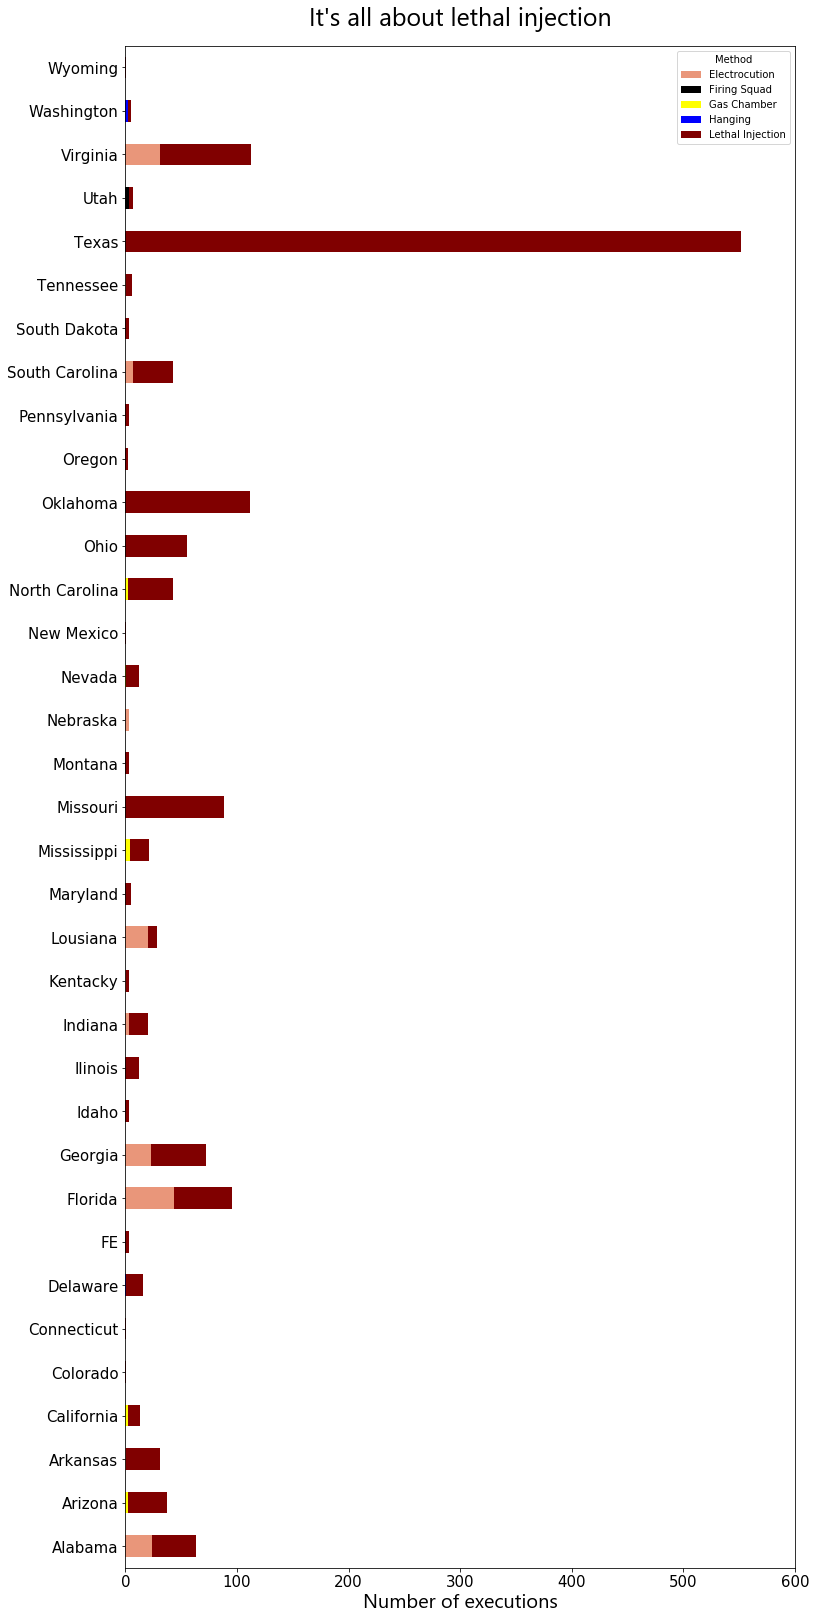

In [47]:
ax = method_state.plot(kind='barh',x='State',stacked=True, color=colors,figsize=(12,28))

ax.set_title("It's all about lethal injection",fontsize=25,fontname="Nirmala UI",pad=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel('Number of executions',fontsize=20,fontname="Nirmala UI")
ax.set_ylabel('US states',fontsize=20,fontname='Nirmala UI')
ax.yaxis.label.set_visible(False)

ax.set_xticks([0,100,200,300,400,500,600])
ax.set_xticklabels(['0','100', '200','300','400','500','600'])

In [48]:
#by_method.plot(kind='barh', x='decade', y='Method', stacked=True)

In [49]:
#method_by_decade = df.groupby('Method').decade.value_counts().sort_values(ascending=False).unstack().reset_index().fillna(0)
#method_by_decade

In [50]:
#state_method = df.groupby('State').Method.value_counts().sort_values(ascending=False).unstack().reset_index().fillna(0)
#state_method

### Some work to get number of each prisoner's victims - to be continued...

In [47]:
victims_1 = df.Number_Race_Sex_of_Victims.str.extract(r"^(\d+)", re.IGNORECASE)
victims_1

0
0       1
1       1
2       2
3       2
4       1
5       2
6       2
7       3
8       2
9       2
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      2
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      1
49      1
50      1
51      1
52      1
53      2
54      1
55      2
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      2
81      1
82      1
83      1
84      2
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98     12
99      2
100     1
101     1
102     2
103     2
104     2
105     1
106     5
107     1
108     1
109     1
110     1
111     1
112     1
113     1
114     1
115     1
116     1
117     1
118     1
119     1
120     1
121     1
122     1
123     1
124     1
125     1
126     1
127     1
128     1
129     1
130     1
131     1
132     1
133     1
134     1
135     1
136     1
137     1
138     1
139   129
140     1
141     1
142     2
143     2
144     5
145     1
146     1
147     1
148     1
149     1
150     1
151     1
152     1
153     1
154     1
155     1
156     1
157     1
158     1
159     1
160     1
161     1
162     1
163     1
164     1
165     1
166     1
167     1
168     2
169     2
170     3
171     3
172     1
173     1
174     1
175     1
176     1
177     1
178     1
179     1
180     1
181     1
182     1
183     1
184     1
185     1
186     1
187     1
188     1
189     1
190     1
191     1
192     1
193     1
194     1
195     1
196     1
197     1
198     2
199     3
200     1
201     1
202     1
203     1
204     1
205     1
206     1
207     1
208     1
209     1
210     1
211     1
212     1
213     1
214     1
215     1
216     1
217     1
218     1
219     1
220     1
221     2
222     2
223     2
224     3
225     1
226     1
227     1
228     2
229     1
230     1
231     1
232     1
233     1
234     1
235     1
236     1
237     1
238     1
239     1
240     1
241     2
242     2
243     1
244     1
245     1
246     1
247     1
248     2
249     1
250     1
251     2
252     3
253     2
254     2
255     3
256     1
257     1
258     1
259     1
260     1
261     1
262     1
263     1
264     1
265     1
266     1
267     1
268     1
269     1
270     1
271     1
272     1
273     1
274     1
275     1
276     1
277     1
278     1
279     1
280     1
281     1
282     1
283     1
284     1
285     1
286     1
287     1
288     1
289     1
290     1
291     1
292     1
293     1
294     1
295     1
296     1
297     1
298     1
299     1
300     1
301     1
302     1
303     1
304     2
305     1
306     2
307     1
308     2
309     1
310     3
311     2
312     1
313     1
314     1
315     1
316     1
317     1
318     1
319     1
320     1
321     1
322     1
323     1
324     1
325     1
326     1
327     1
328     1
329     1
330     1
331     1
332     1
333     1
334     1
335     1
336     1
337     1
338     1
339     1
340     1
341     1
342     1
343     1
344     1
345     1
346     1
347     1
348     1
349     1
350     2
351     2
352     1
353     1
354     2
355     1
356     1
357     2
358     2
359     1
360     1
361     1
362     1
363     1
364     1
365     1
366     1
367     1
368     1
369     1
370     1
371     1
372     1
373     1
374     1
375     1
376     1
377     1
378     1
379     1
380     1
381     1
382     1
383     1
384     1
385     1
386     1
387     1
388     1
389     1
390     1
391     1
392     1
393     1
394     1
395     1
396     1
397     1
398     1
399     

In [48]:
victims_2 = df.Number_Race_Sex_of_Victims.str.extract(r"[)](\d+) \w+", re.IGNORECASE)
victims_2

0
0       1
1       1
2     NaN
3     NaN
4       1
5     NaN
6     NaN
7     NaN
8       2
9       2
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28      1
29      2
30      1
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
40      1
41    NaN
42    NaN
43      1
44    NaN
45    NaN
46    NaN
47    NaN
48    NaN
49    NaN
50    NaN
51    NaN
52    NaN
53    NaN
54      1
55      2
56    NaN
57    NaN
58    NaN
59    NaN
60    NaN
61    NaN
62    NaN
63    NaN
64    NaN
65    NaN
66    NaN
67    NaN
68    NaN
69    NaN
70    NaN
71    NaN
72    NaN
73    NaN
74    NaN
75    NaN
76    NaN
77    NaN
78    NaN
79      1
80    NaN
81      2
82      1
83      1
84    NaN
85      1
86    NaN
87    NaN
88    NaN
89    NaN
90    NaN
91    NaN
92    NaN
93    NaN
94    NaN
95    NaN
96    NaN
97      3
98    NaN
99    NaN
100     1
101     1
102   NaN
103     1
104     1
105     4
106     1
107   NaN
108   NaN
109   NaN
110   NaN
111   NaN
112   NaN
113   NaN
114   NaN
115   NaN
116   NaN
117   NaN
118   NaN
119   NaN
120   NaN
121   NaN
122   NaN
123   NaN
124   NaN
125   NaN
126   NaN
127   NaN
128   NaN
129   NaN
130   NaN
131   NaN
132   NaN
133   NaN
134   NaN
135   NaN
136   NaN
137   NaN
138     1
139   NaN
140     1
141     1
142   NaN
143   NaN
144   NaN
145   NaN
146   NaN
147   NaN
148   NaN
149   NaN
150   NaN
151   NaN
152   NaN
153   NaN
154   NaN
155   NaN
156   NaN
157   NaN
158   NaN
159     1
160   NaN
161   NaN
162   NaN
163   NaN
164   NaN
165   NaN
166   NaN
167   NaN
168   NaN
169   NaN
170   NaN
171   NaN
172     1
173   NaN
174     1
175   NaN
176   NaN
177   NaN
178   NaN
179   NaN
180   NaN
181   NaN
182   NaN
183   NaN
184   NaN
185   NaN
186   NaN
187   NaN
188   NaN
189   NaN
190   NaN
191   NaN
192   NaN
193   NaN
194   NaN
195     1
196     1
197     1
198   NaN
199     1
200   NaN
201   NaN
202   NaN
203   NaN
204   NaN
205   NaN
206   NaN
207   NaN
208   NaN
209   NaN
210   NaN
211   NaN
212   NaN
213   NaN
214   NaN
215   NaN
216   NaN
217   NaN
218   NaN
219   NaN
220     1
221   NaN
222   NaN
223     1
224   NaN
225     2
226   NaN
227   NaN
228     1
229   NaN
230     1
231   NaN
232   NaN
233   NaN
234   NaN
235   NaN
236   NaN
237   NaN
238   NaN
239   NaN
240   NaN
241     1
242     1
243   NaN
244   NaN
245   NaN
246     1
247     1
248   NaN
249   NaN
250     1
251   NaN
252   NaN
253     1
254     2
255     2
256   NaN
257   NaN
258   NaN
259   NaN
260   NaN
261   NaN
262   NaN
263   NaN
264   NaN
265     1
266   NaN
267   NaN
268   NaN
269   NaN
270   NaN
271   NaN
272   NaN
273   NaN
274   NaN
275   NaN
276   NaN
277   NaN
278   NaN
279     1
280   NaN
281   NaN
282   NaN
283   NaN
284   NaN
285   NaN
286   NaN
287   NaN
288   NaN
289   NaN
290   NaN
291   NaN
292   NaN
293   NaN
294   NaN
295   NaN
296   NaN
297   NaN
298   NaN
299   NaN
300   NaN
301   NaN
302     1
303   NaN
304   NaN
305     1
306   NaN
307     1
308   NaN
309     2
310   NaN
311     1
312   NaN
313   NaN
314   NaN
315   NaN
316   NaN
317   NaN
318   NaN
319   NaN
320   NaN
321   NaN
322   NaN
323   NaN
324   NaN
325   NaN
326   NaN
327   NaN
328   NaN
329   NaN
330   NaN
331   NaN
332   NaN
333   NaN
334   NaN
335   NaN
336   NaN
337   NaN
338   NaN
339   NaN
340   NaN
341   NaN
342   NaN
343   NaN
344   NaN
345   NaN
346   NaN
347     1
348     1
349     1
350   NaN
351   NaN
352   NaN
353     1
354   NaN
355     1
356     1
357   NaN
358     1
359   NaN
360   NaN
361   NaN
362   NaN
363   NaN
364   NaN
365   NaN
366   NaN
367   NaN
368   NaN
369   NaN
370   NaN
371   NaN
372   NaN
373   NaN
374   NaN
375   NaN
376   NaN
377   NaN
378   NaN
379   NaN
380   NaN
381   NaN
382   NaN
383   NaN
384   NaN
385   NaN
386   NaN
387   NaN
388   NaN
389   NaN
390   NaN
391   NaN
392   NaN
393   NaN
394   NaN
395   NaN
396   NaN
397   NaN
398   NaN
399   Na

In [49]:
victims_3 = df.Number_Race_Sex_of_Victims.str.extract(r"s[)].*[(]s[)](\d+)", re.IGNORECASE)
victims_3

0
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
40    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
47    NaN
48    NaN
49    NaN
50    NaN
51    NaN
52    NaN
53    NaN
54    NaN
55    NaN
56    NaN
57    NaN
58    NaN
59    NaN
60    NaN
61    NaN
62    NaN
63    NaN
64    NaN
65    NaN
66    NaN
67    NaN
68    NaN
69    NaN
70    NaN
71    NaN
72    NaN
73    NaN
74    NaN
75    NaN
76    NaN
77    NaN
78    NaN
79    NaN
80    NaN
81    NaN
82    NaN
83    NaN
84    NaN
85    NaN
86    NaN
87    NaN
88    NaN
89    NaN
90    NaN
91    NaN
92    NaN
93    NaN
94    NaN
95    NaN
96    NaN
97    NaN
98    NaN
99    NaN
100   NaN
101   NaN
102   NaN
103   NaN
104   NaN
105   NaN
106   NaN
107   NaN
108   NaN
109   NaN
110   NaN
111   NaN
112   NaN
113   NaN
114   NaN
115   NaN
116   NaN
117   NaN
118   NaN
119   NaN
120   NaN
121   NaN
122   NaN
123   NaN
124   NaN
125   NaN
126   NaN
127   NaN
128   NaN
129   NaN
130   NaN
131   NaN
132   NaN
133   NaN
134   NaN
135   NaN
136   NaN
137   NaN
138   NaN
139   NaN
140   NaN
141   NaN
142   NaN
143   NaN
144   NaN
145   NaN
146   NaN
147   NaN
148   NaN
149   NaN
150   NaN
151   NaN
152   NaN
153   NaN
154   NaN
155   NaN
156   NaN
157   NaN
158   NaN
159   NaN
160   NaN
161   NaN
162   NaN
163   NaN
164   NaN
165   NaN
166   NaN
167   NaN
168   NaN
169   NaN
170   NaN
171   NaN
172     3
173   NaN
174     2
175   NaN
176   NaN
177   NaN
178   NaN
179   NaN
180   NaN
181   NaN
182   NaN
183   NaN
184   NaN
185   NaN
186   NaN
187   NaN
188   NaN
189   NaN
190   NaN
191   NaN
192   NaN
193   NaN
194   NaN
195   NaN
196   NaN
197   NaN
198   NaN
199   NaN
200   NaN
201   NaN
202   NaN
203   NaN
204   NaN
205   NaN
206   NaN
207   NaN
208   NaN
209   NaN
210   NaN
211   NaN
212   NaN
213   NaN
214   NaN
215   NaN
216   NaN
217   NaN
218   NaN
219   NaN
220   NaN
221   NaN
222   NaN
223   NaN
224   NaN
225   NaN
226   NaN
227   NaN
228   NaN
229   NaN
230   NaN
231   NaN
232   NaN
233   NaN
234   NaN
235   NaN
236   NaN
237   NaN
238   NaN
239   NaN
240   NaN
241   NaN
242   NaN
243   NaN
244   NaN
245   NaN
246   NaN
247   NaN
248   NaN
249   NaN
250   NaN
251   NaN
252   NaN
253   NaN
254   NaN
255   NaN
256   NaN
257   NaN
258   NaN
259   NaN
260   NaN
261   NaN
262   NaN
263   NaN
264   NaN
265   NaN
266   NaN
267   NaN
268   NaN
269   NaN
270   NaN
271   NaN
272   NaN
273   NaN
274   NaN
275   NaN
276   NaN
277   NaN
278   NaN
279   NaN
280   NaN
281   NaN
282   NaN
283   NaN
284   NaN
285   NaN
286   NaN
287   NaN
288   NaN
289   NaN
290   NaN
291   NaN
292   NaN
293   NaN
294   NaN
295   NaN
296   NaN
297   NaN
298   NaN
299   NaN
300   NaN
301   NaN
302   NaN
303   NaN
304   NaN
305   NaN
306   NaN
307   NaN
308   NaN
309   NaN
310   NaN
311   NaN
312   NaN
313   NaN
314   NaN
315   NaN
316   NaN
317   NaN
318   NaN
319   NaN
320   NaN
321   NaN
322   NaN
323   NaN
324   NaN
325   NaN
326   NaN
327   NaN
328   NaN
329   NaN
330   NaN
331   NaN
332   NaN
333   NaN
334   NaN
335   NaN
336   NaN
337   NaN
338   NaN
339   NaN
340   NaN
341   NaN
342   NaN
343   NaN
344   NaN
345   NaN
346   NaN
347   NaN
348   NaN
349   NaN
350   NaN
351   NaN
352   NaN
353   NaN
354   NaN
355   NaN
356   NaN
357   NaN
358   NaN
359   NaN
360   NaN
361   NaN
362   NaN
363   NaN
364   NaN
365   NaN
366   NaN
367   NaN
368   NaN
369   NaN
370   NaN
371   NaN
372   NaN
373   NaN
374   NaN
375   NaN
376   NaN
377   NaN
378   NaN
379   NaN
380   NaN
381   NaN
382   NaN
383   NaN
384   NaN
385   NaN
386   NaN
387   NaN
388   NaN
389   NaN
390   NaN
391   NaN
392   NaN
393   NaN
394   NaN
395   NaN
396   NaN
397   NaN
398   NaN
399   Na

In [50]:
df['decade'].value_counts()

00s             590
90s             478
10s             289
80s             117
70s               3
unknown year      2
Name: decade, dtype: int64

In [51]:
df['State'].value_counts()

Texas             552
Virginia          113
Oklahoma          112
Florida            96
Missouri           88
Georgia            72
Alabama            63
Ohio               55
South Carolina     43
North Carolina     43
Arizona            37
Arkansas           31
Lousiana           28
Mississippi        21
Indiana            20
Delaware           16
California         13
Nevada             12
Ilinois            12
Utah                7
Tennessee           6
Washington          5
Maryland            5
South Dakota        3
Kentacky            3
Idaho               3
Pennsylvania        3
Montana             3
FE                  3
Nebraska            3
Oregon              2
New Mexico          1
Wyoming             1
Connecticut         1
Colorado            1
Name: State, dtype: int64